In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import string
import nltk
nltk.download('punkt')
from django.http import HttpResponse


# Read the txt file and create a pandas DataFrame
df = pd.read_csv('chatwsp.txt', header=None)

# Print the DataFrame
print(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


           0                                                  1  \
0    12/8/20   8:45 AM - Messages and calls are end-to-end e...   
1    12/8/20                      8:45 AM - /n: <Media omitted>   
2    12/8/20                      8:45 AM - /n: <Media omitted>   
3    12/8/20                      8:45 AM - /n: <Media omitted>   
4    12/8/20                            8:46 AM - Fred Caro: 👍🏻   
5   12/24/20                            6:49 PM - /n: Hola Fred   
6   12/24/20                         6:49 PM - /n: Ya hay bebé?   
7   12/24/20                                   6:50 PM - /n: 👧🏼   
8   12/24/20                                 7:30 PM - /n: Fred   
9   12/24/20                             7:30 PM - /n: Ya nacio   
10  12/24/20   8:28 PM - Fred Caro: No! Tenemos que esperar....   
11  12/24/20                                   9:01 PM - /n: Ya   
12  12/24/20                           9:01 PM - Fred Caro: No.   
13   6/26/22               4:09 PM - Fred Caro: <Media omitted

In [3]:
df.columns = ['Date', 'Convo', 'add1', 'add2']

In [4]:
print(df["Convo"])
Chat = df["Convo"].str.split("-", n = 1, 
                             expand = True)
df['Time'] = Chat[0]
df['Content'] = Chat[1]
Chat1 = df["Content"].str.split(": ", n = 1, expand=True)

print(df["Content"])

0      8:45 AM - Messages and calls are end-to-end e...
1                         8:45 AM - /n: <Media omitted>
2                         8:45 AM - /n: <Media omitted>
3                         8:45 AM - /n: <Media omitted>
4                               8:46 AM - Fred Caro: 👍🏻
5                               6:49 PM - /n: Hola Fred
6                            6:49 PM - /n: Ya hay bebé?
7                                      6:50 PM - /n: 👧🏼
8                                    7:30 PM - /n: Fred
9                                7:30 PM - /n: Ya nacio
10     8:28 PM - Fred Caro: No! Tenemos que esperar....
11                                     9:01 PM - /n: Ya
12                             9:01 PM - Fred Caro: No.
13                 4:09 PM - Fred Caro: <Media omitted>
14                 4:09 PM - Fred Caro: <Media omitted>
15                 4:09 PM - Fred Caro: <Media omitted>
16                 4:09 PM - Fred Caro: <Media omitted>
17                 4:09 PM - Fred Caro: <Media o

In [5]:
df['User'] = Chat1[0]
df['Message'] = Chat1[1]
print(df['User'])

0      Messages and calls are end-to-end encrypted. ...
1                                                    /n
2                                                    /n
3                                                    /n
4                                             Fred Caro
5                                                    /n
6                                                    /n
7                                                    /n
8                                                    /n
9                                                    /n
10                                            Fred Caro
11                                                   /n
12                                            Fred Caro
13                                            Fred Caro
14                                            Fred Caro
15                                            Fred Caro
16                                            Fred Caro
17                                            Fr

In [6]:
df = df.drop(columns = ['Convo', 'add1', 'add2'])
print(df)

        Date        Time                                            Content  \
0    12/8/20    8:45 AM    Messages and calls are end-to-end encrypted. ...   
1    12/8/20    8:45 AM                                 /n: <Media omitted>   
2    12/8/20    8:45 AM                                 /n: <Media omitted>   
3    12/8/20    8:45 AM                                 /n: <Media omitted>   
4    12/8/20    8:46 AM                                       Fred Caro: 👍🏻   
5   12/24/20    6:49 PM                                       /n: Hola Fred   
6   12/24/20    6:49 PM                                    /n: Ya hay bebé?   
7   12/24/20    6:50 PM                                              /n: 👧🏼   
8   12/24/20    7:30 PM                                            /n: Fred   
9   12/24/20    7:30 PM                                        /n: Ya nacio   
10  12/24/20    8:28 PM    Fred Caro: No! Tenemos que esperar. La bebe t...   
11  12/24/20    9:01 PM                             

In [7]:
df['Message'] = df['Message'].str.lower()

In [8]:
df['Message'] = df['Message'].str.replace('<Media omitted>', 'Media Shared')

In [9]:
df['Message'] = df['Message'].str.replace('this message was deleted', 'DeletedMsg')

In [10]:
print(df)

        Date        Time                                            Content  \
0    12/8/20    8:45 AM    Messages and calls are end-to-end encrypted. ...   
1    12/8/20    8:45 AM                                 /n: <Media omitted>   
2    12/8/20    8:45 AM                                 /n: <Media omitted>   
3    12/8/20    8:45 AM                                 /n: <Media omitted>   
4    12/8/20    8:46 AM                                       Fred Caro: 👍🏻   
5   12/24/20    6:49 PM                                       /n: Hola Fred   
6   12/24/20    6:49 PM                                    /n: Ya hay bebé?   
7   12/24/20    6:50 PM                                              /n: 👧🏼   
8   12/24/20    7:30 PM                                            /n: Fred   
9   12/24/20    7:30 PM                                        /n: Ya nacio   
10  12/24/20    8:28 PM    Fred Caro: No! Tenemos que esperar. La bebe t...   
11  12/24/20    9:01 PM                             

In [11]:
# Open the text file in write mode
with open('column.txt', 'w', encoding='utf-8') as f:
    # Iterate through the rows of the 'Column' column
    for value in df['Message']:
        # Write the value to the text file
        f.write(str(value) + '\n')

In [12]:
with open('column.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
text = text.translate(text.maketrans('', '', string.punctuation))
text = text.lower()
print(text)

none
media omitted
media omitted
media omitted
👍🏻
hola fred
ya hay bebé
👧🏼
fred
ya nacio
no tenemos que esperar la bebe toma su tiempo
ya
no
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
httpsyoutubelqovjpfabf4
httpsyoutubej6i31bahmuc
httpsyoutubeh3v1zuu888
httpsyoutube5bxa3aon89y
httpsyoutube5u4rd0a0ya
httpsyoutube2wzqwhwt8ze
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
donde estan
httpsyoutube90qde6dqxf4
estan en el museo 
si
ya estamos terminando
ok
media omitted
ya terminamos
httpstwittercomcanalplusf1status1543864484103593985tunqqkzffrbxdskmh3u8las08
media omitted
hahaha
httpsyoutubebl0wrl9aiu
httpsyoutubecomshortsxuyqaj0814wfeatureshare
salut fred
salut andres ça va 
httpstwittercomplhvmlstatus1243987581781577729tea9jvmqurnb2muennuqcags08
hahahaha



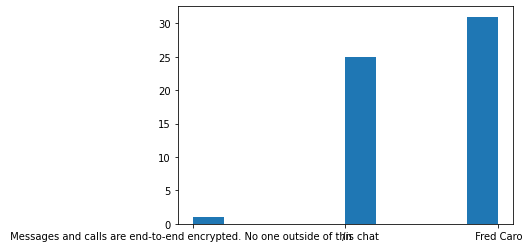

In [13]:
# Extract the values from the 'Column' column
values = df['User'].values

# Create a histogram
plt.hist(values, bins=10)

# Show the plot
plt.show()

In [14]:
# Tokenizar el texto en palabras
words = nltk.word_tokenize(text)
print(text)


none
media omitted
media omitted
media omitted
👍🏻
hola fred
ya hay bebé
👧🏼
fred
ya nacio
no tenemos que esperar la bebe toma su tiempo
ya
no
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
httpsyoutubelqovjpfabf4
httpsyoutubej6i31bahmuc
httpsyoutubeh3v1zuu888
httpsyoutube5bxa3aon89y
httpsyoutube5u4rd0a0ya
httpsyoutube2wzqwhwt8ze
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
media omitted
donde estan
httpsyoutube90qde6dqxf4
estan en el museo 
si
ya estamos terminando
ok
media omitted
ya terminamos
httpstwittercomcanalplusf1status1543864484103593985tunqqkzffrbxdskmh3u8las08
media omitted
hahaha
httpsyoutubebl0wrl9aiu
httpsyoutubecomshortsxuyqaj0814wfeatureshare
salut fred
salut andres ça va 
httpstwittercomplhvmlstatus1243987581781577729tea9jvmqurnb2muennuqcags08
hahahaha



In [15]:
# Crear un diccionario vacío y contar la frecuencia de cada palabra
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

In [16]:
wordcloud = WordCloud(width=1500, height=1500, margin=0).generate_from_frequencies(word_freq)


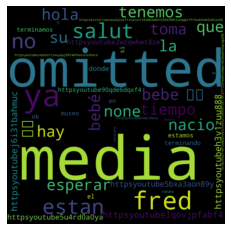

In [17]:
# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()